# Import des données

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
df_train = pd.read_csv('train.csv')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_train[['label']].value_counts()

label
1        4684
7        4401
3        4351
9        4188
2        4177
6        4137
0        4132
4        4072
8        4063
5        3795
Name: count, dtype: int64

In [45]:
X = df_train.drop('label', axis=1)
y = df_train.pop('label')

In [46]:
X = X.astype(float).to_numpy().reshape((-1,28,28))
y = y.astype(float).to_numpy()
y

array([1., 0., 1., ..., 7., 6., 9.])

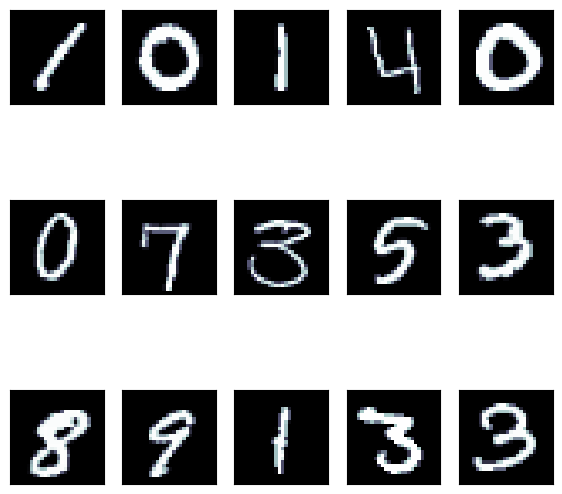

In [47]:
fig, ax = plt.subplots(3, 5, figsize=(7,7))
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='bone')
    axi.set(xticks=[], yticks=[])

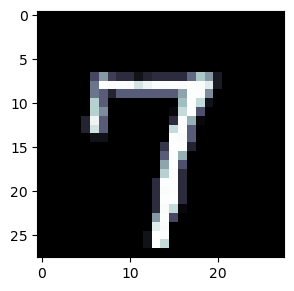

In [48]:
fig = plt.figure(figsize=(7,7))
plt.subplot(1,2, 1)
plt.imshow(X[6], cmap='bone');

# Définir notre Kernel

In [49]:
import tensorflow as tf

kernel = tf.constant([
[3,3,1,1,1,1,1,1,1,1,1,1]
])

In [50]:
def Reformat(df, nb, kernel):

    image = tf.image.resize(np.expand_dims(df[nb], axis=-1), size=[400, 400])
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = tf.expand_dims(image, axis=0)

    return image

In [51]:
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# Convolution

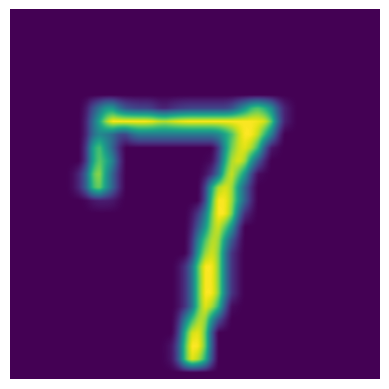

In [52]:
from tensorflow import keras
from tensorflow.keras import layers

conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=Reformat(X,6,kernel),
    filters=kernel,
    strides=1, 
    padding='SAME',
)

plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show();

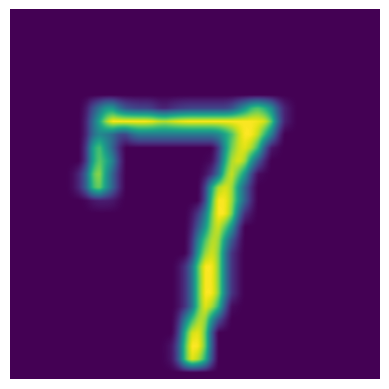

In [53]:
relu_fn = tf.nn.relu

image_detect = relu_fn(image_filter)

plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)
plt.axis('off')
plt.show();

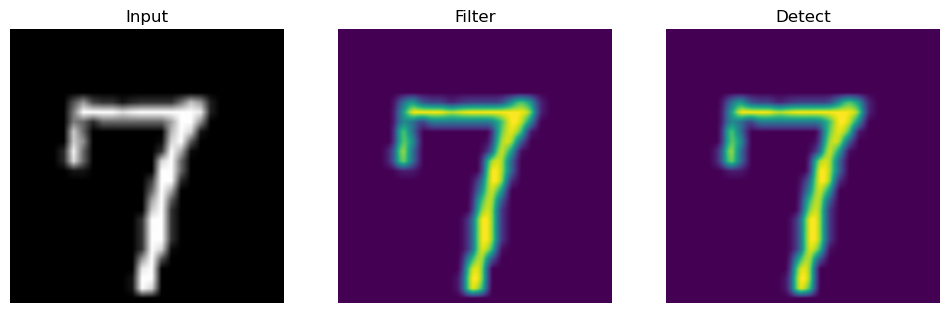

In [54]:
image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.title('Input')
plt.subplot(132)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Filter')
plt.subplot(133)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Detect')
plt.show();

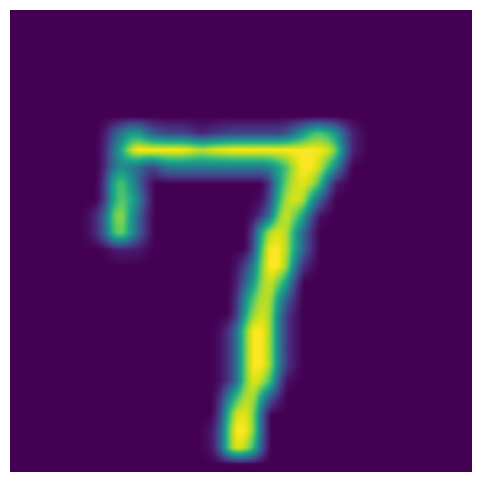

In [55]:
image_condense = tf.nn.pool(
    input=image_detect,
    window_shape=(2, 2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.show();